In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory="EyeDataset/"
classes=['0','1']

In [3]:
img_size=224

In [4]:
training_data=[]
def creating_training_data():
    for c in classes:
        path=os.path.join(directory,c)
        class_num=classes.index(c)
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                back_rgb=cv2.cvtColor(img_arr,cv2.COLOR_GRAY2RGB)
                new_arr=cv2.resize(back_rgb,(img_size,img_size))
                training_data.append([new_arr,class_num])
            except Exception as e:
                pass

In [5]:
creating_training_data()

In [6]:
import random

In [7]:
random.shuffle(training_data)

In [8]:
datagen = ImageDataGenerator(
    rotation_range=15,        # Rotate images by up to 15 degrees
    width_shift_range=0.1,    # Shift the image width by 10%
    height_shift_range=0.1,   # Shift the image height by 10%
    shear_range=0.1,          # Shear the image
    zoom_range=0.2,           # Zoom in/out by up to 20%
    horizontal_flip=True,     # Randomly flip images
    brightness_range=[0.8, 1.2], # Adjust brightness
    fill_mode='nearest'       # Fill in missing pixels after transformations
)

# Example of augmenting the images and adding them to the dataset
augmented_training_data = []



In [9]:
for img, label in training_data:
    img = img.reshape((1,) + img.shape)  # Reshape image for flow method
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_image = batch[0].astype('uint8')
        augmented_training_data.append([augmented_image, label])  # Add augmented image and label
        # Save augmented images (optional)
        # cv2.imwrite(f'augmented_{label}_{i}.png', augmented_image)
        i += 1
        if i > 10:  # Limit the number of augmentations per image
            break

# Combine original and augmented data
training_data.extend(augmented_training_data)

In [10]:
random.shuffle(training_data)

In [11]:
x=[]
y=[]
for feature,lable in training_data:
    x.append(feature)
    y.append(lable)
x=np.array(x).reshape(-1,img_size,img_size,3)
x=x/255.0
y = np.array(y)

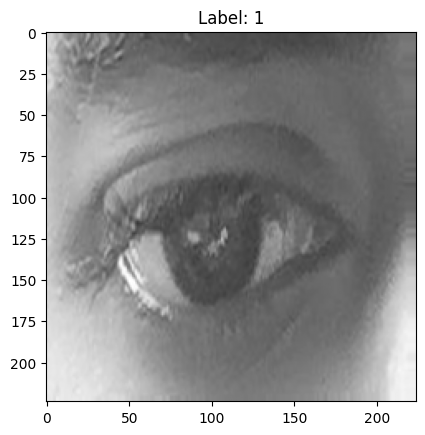

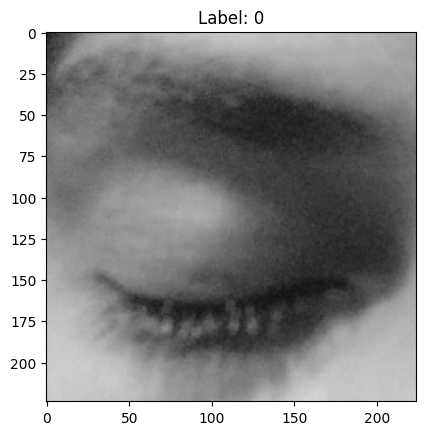

In [13]:
for i in range(2):
    plt.imshow(x[i])
    plt.title(f'Label: {y[i]}')
    plt.show()


In [12]:
import pickle

In [ ]:
po=open("x.pickle","wb")
pickle.dump(x,po)
po.close()

In [13]:
po=open("y.pickle","wb")
pickle.dump(y,po)
po.close()

In [14]:
pi=open("x.pickle","rb")
x=pickle.load(pi)

In [15]:
pi=open("y.pickle","rb")
y=pickle.load(pi)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
from tensorflow.keras.applications import MobileNetV2

In [16]:
weights_path='mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224.h5'
model = tf.keras.applications.MobileNetV2(weights=weights_path)
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [17]:
model.trainable = False

# Start building the new model
base_input = model.input
base_output = model.layers[-2].output

In [18]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [19]:
# Add fully connected layers
final_output = layers.Dense(128, activation='relu')(base_output)
final_output = layers.Dropout(0.5)(final_output)  # Dropout for regularization
final_output = layers.Dense(64, activation='relu')(final_output)
final_output = layers.Dropout(0.5)(final_output)  # Dropout for regularization
final_output = layers.Dense(32, activation='relu')(final_output)

# Output layer for binary classification (2 classes)
final_output = layers.Dense(2, activation='softmax')(final_output)

In [20]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [21]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,432,354 (9.28 MB)

 Trainable params: 174,370 (681.13 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [22]:
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.metrics import f1_score, mean_squared_error

In [23]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [24]:
history=new_model.fit(x,y,epochs=15,verbose=1)

Epoch 1/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 181s 244ms/step - accuracy: 0.9114 - loss: 0.2050
Epoch 2/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 204s 278ms/step - accuracy: 0.9872 - loss: 0.0369
Epoch 3/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 187s 255ms/step - accuracy: 0.9920 - loss: 0.0236
Epoch 4/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 187s 255ms/step - accuracy: 0.9944 - loss: 0.0165
Epoch 5/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 193s 263ms/step - accuracy: 0.9950 - loss: 0.0139
Epoch 6/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 192s 262ms/step - accuracy: 0.9957 - loss: 0.0124
Epoch 7/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 231s 315ms/step - accuracy: 0.9954 - loss: 0.0135
Epoch 8/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 215s 293ms/step - accuracy: 0.9967 - loss: 0.0109
Epoch 9/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 203s 277ms/step - accuracy: 0.9970 - loss: 0.0094
Epoch 10/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 214s 292ms/step - accuracy: 0.9964 - loss: 0.0098
Epoch 11/15
733/733 ━━━━━━━━━━━━━━━━━━━━ 194s 264ms/step - accuracy: 0.9961 - loss: 0.0104
Epoch 12

In [25]:
import matplotlib.pyplot as plt

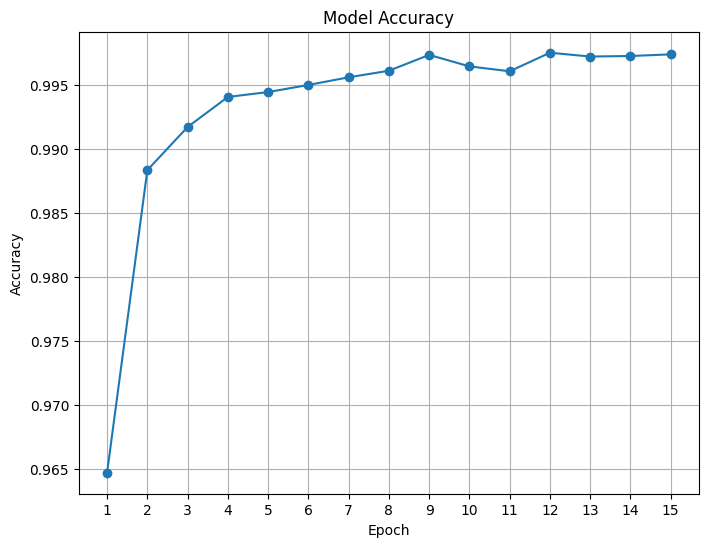

In [26]:
# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Set the x-axis to have ticks every 1 unit, starting from 1
plt.xticks(range(1, len(history.history['accuracy']) + 1, 1))

plt.show()

In [32]:
# Assuming new_model is your trained model
new_model.save('Drowsiness_Detection_SOFTMAX_Main.h5')

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
nm=tf.keras.models.load_model('Drowsiness_Detection_SOFTMAX_Main.h5')

In [4]:
test_image="/Users/t.s.vinoth/Desktop/Project/mrl/Screenshot 2024-09-03 at 12.17.22 AM.png"

In [5]:
img=cv2.imread('/Users/t.s.vinoth/Desktop/Project/mrl/Screenshot 2024-09-03 at 12.17.22 AM.png',cv2.IMREAD_GRAYSCALE)

In [6]:
img_size=224
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [7]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

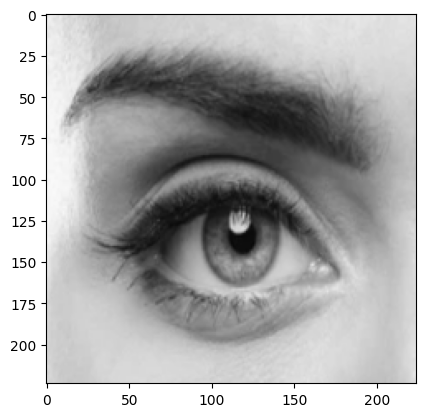

In [8]:
plt.imshow(new_array)

In [9]:
X_input=X_input/255.0

In [11]:
prediction = nm.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


In [12]:
prediction

array([[1.4865461e-12, 1.0000000e+00]], dtype=float32)

In [13]:
max(prediction[0])

1.0

In [14]:
img=cv2.imread('/Users/t.s.vinoth/Desktop/Screenshot 2024-10-09 at 10.04.42 AM.png',cv2.IMREAD_GRAYSCALE)

In [15]:
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [16]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

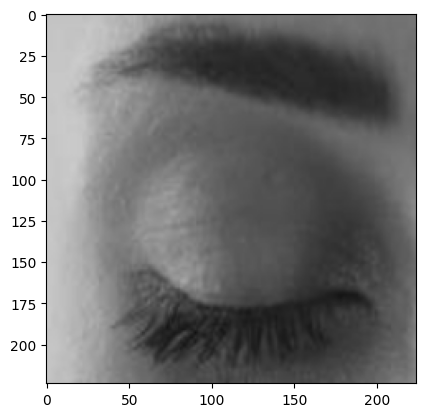

In [17]:
plt.imshow(new_array)

In [18]:
X_input=X_input/255.0

In [19]:
prediction = nm.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [20]:
prediction

array([[9.9995637e-01, 4.3571388e-05]], dtype=float32)

In [21]:
max(prediction[0])

0.99995637